# Offline

In [1]:
import numpy as np
from model.simulator import SyntheticSimulator

radius_post = 0.1
center_post = np.array([
    [0.5, 0.5],
    [0.5+2*radius_post, 0.5],
    [0.5-2*radius_post, 0.5],
    [0.5, 0.5-2*radius_post],
    [0.5, 0.5+2*radius_post],
])

sim_kwds = {    
    'S':            np.array([[0., 1.], [0., 1.]]),
    'center_post':  center_post,
    'radius_post':  radius_post,
    'nu':       0.5,
    'T':        np.array([0., 1.]),
    'mu0':      50,
    'mu1':      5000,
    'beta':     1.0,
    'alpha':    0.
}


# pre-change data
sim_kwds_ = sim_kwds.copy()
sim_kwds_['nu'] = 1.0
sim = SyntheticSimulator(**sim_kwds_)
data_pre = sim.simulate(verbose=True, restart=False, lam_bar=sim_kwds_['mu1'])   # [ nsample, 3 ]

# post-change data
sim_kwds_ = sim_kwds.copy()
sim_kwds_['nu'] = 0.0
sim_kwds_['radius_post'] = 1.0
sim = SyntheticSimulator(**sim_kwds_)
data_post = sim.simulate(verbose=True, restart=False, lam_bar=sim_kwds_['mu1'])   # [ nsample, 3 ]

# test data
sim = SyntheticSimulator(**sim_kwds)
data = sim.simulate(verbose=True, restart=False, lam_bar=sim_kwds_['mu1'])   # [ nsample, 3 ]

Synthetic simulator:  99%|█████████▉| 99/100 [00:00<00:00, 735.32it/s]


lam_bar: 5000, observed max lam: 50.00


Synthetic simulator:  99%|█████████▉| 99/100 [00:02<00:00, 35.86it/s]


lam_bar: 5000, observed max lam: 5000.00


Synthetic simulator:  99%|█████████▉| 99/100 [00:00<00:00, 504.52it/s]

lam_bar: 5000, observed max lam: 5000.00


In [2]:
from model.score import ScoreModel

score_kwds = {
    'ndim': 3,
    'radius': radius_post,
    'ff_layers': [64],
    'rn_layers': 2,
    'rn_hidden': 64,
    'use_transform': False
}

f0 = ScoreModel(**score_kwds)
f1 = ScoreModel(**score_kwds)

In [3]:
# fit_kwds = {
#     'data': data_pre,
#     'batch_size': 256,
#     'n_epochs': 100,
#     'lr': 0e-3,
#     'sigma': 0.1,
#     'save_folder': 'cache/demo/offline/f0'
# }

# f0.fit(**fit_kwds)

In [4]:
f0.load('cache/demo/offline/f0')

In [5]:
# fit_kwds = {
#     'data': data_post,
#     'batch_size': 256,
#     'n_epochs': 100,
#     'lr': 0e-3,
#     'sigma': 0.1,
#     'save_folder': 'cache/demo/offline/f1'
# }

# f1.fit(**fit_kwds)

In [6]:
f1.load('cache/demo/offline/f1')

In [7]:
from model.detect import SpatioTemporalDetector

offline_kwds = {
    'data': data,
    'ntt': 100,
    'K': 5,
    'verbose': True,
    'nres': 20,
    'radius': 0.05,
    'use_grid': False
} 

detector = SpatioTemporalDetector(f0, f1)
tt, tau_list, omega_list, stat_list, measure = detector.offline(**offline_kwds)

Offline: 100%|██████████| 100/100 [00:00<00:00, 2881.42it/s]


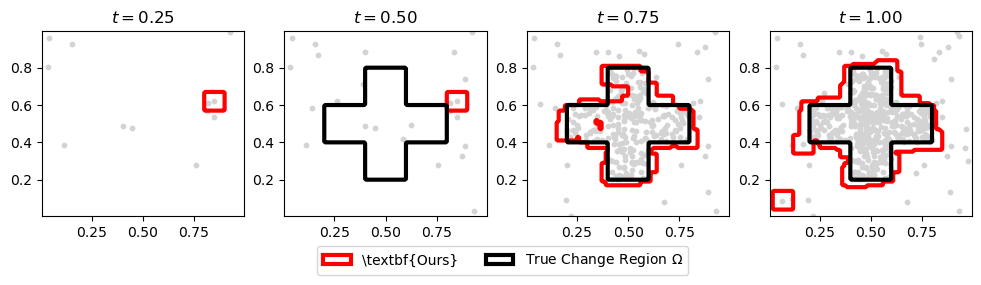

In [8]:
from utils.plot import visualize
visualize(center_list=omega_list, radius=offline_kwds['radius'], data=data, center_post=center_post, radius_post=radius_post)

# Online

In [9]:
import numpy as np
from model.simulator import SyntheticSimulator

radius_post = 0.1
center_post = np.array([
    [0.5, 0.5],
    [0.5+2*radius_post, 0.5],
    [0.5-2*radius_post, 0.5],
    [0.5, 0.5-2*radius_post],
    [0.5, 0.5+2*radius_post],
])

sim_kwds = {    
    'S':            np.array([[0., 1.], [0., 1.]]),
    'center_post':  center_post,
    'radius_post':  radius_post,
    'nu':       0.5,
    'T':        np.array([0., 1.]),
    'mu0':      50,
    'mu1':      5000,
    'beta':     1.0,
    'alpha':    0.
}


# pre-change data
sim_kwds_ = sim_kwds.copy()
sim_kwds_['nu'] = 1.0
sim = SyntheticSimulator(**sim_kwds_)
data_pre = sim.simulate(verbose=True, restart=False, lam_bar=sim_kwds_['mu1'])   # [ nsample, 3 ]

# test data
sim = SyntheticSimulator(**sim_kwds)
data = sim.simulate(verbose=True, restart=False, lam_bar=sim_kwds_['mu1'])   # [ nsample, 3 ]

Synthetic simulator:  99%|█████████▉| 99/100 [00:00<00:00, 860.44it/s]


lam_bar: 5000, observed max lam: 50.00


Synthetic simulator:  99%|█████████▉| 99/100 [00:00<00:00, 449.72it/s]

lam_bar: 5000, observed max lam: 5000.00


In [10]:
from model.score import ScoreModel

score_kwds = {
    'ndim': 3,
    'radius': radius_post,
    'ff_layers': [64],
    'rn_layers': 2,
    'rn_hidden': 64,
    'use_transform': False
}

f0 = ScoreModel(**score_kwds)
f1 = ScoreModel(**score_kwds)

In [11]:
# fit_kwds = {
#     'data': data_pre,
#     'batch_size': 256,
#     'n_epochs': 100,
#     'lr': 0e-3,
#     'sigma': 0.1,
#     'save_folder': 'cache/demo/offline/f0'
# }

# f0.fit(**fit_kwds)

In [12]:
f0.load('cache/demo/offline/f0')
f1.load('cache/demo/offline/f0')

In [13]:
from model.detect import SpatioTemporalDetector

fit_update_kwds = {
    'batch_size': 256,
    'n_epochs': 1,
    'lr': 0e-3,
    'sigma': 0.1,
}

online_kwds = {
    'data': data,
    'ntt': 100,
    'K': 5,
    'n_update': 10,
    'window': None,
    'verbose': True,
    'nres': 20,
    'fit_kwds': fit_update_kwds,
    'radius': 0.05,
    'use_grid': False
} 

detector = SpatioTemporalDetector(f0, f1)
tt, tau_list, omega_list, stat_list, measure = detector.online(**online_kwds)

Online: 100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


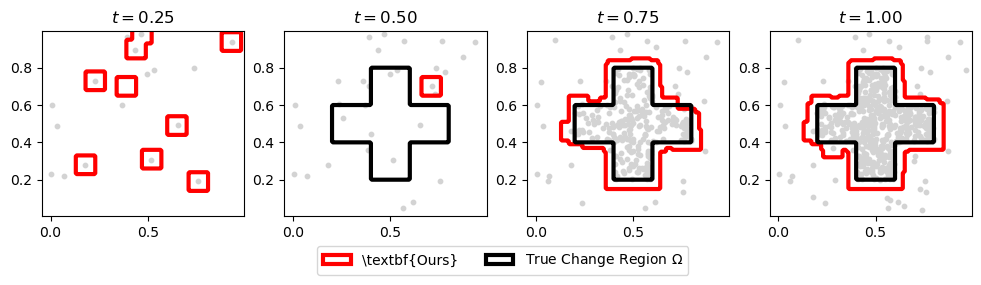

In [14]:
from utils.plot import visualize
visualize(center_list=omega_list, radius=offline_kwds['radius'], data=data, center_post=center_post, radius_post=radius_post)